In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
login_times = pd.read_json('logins.json')

In [3]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#ultimate_data_challenge = pd.read_json('ultimate_data_challenge.json')

In [5]:
#ultimate_data_challenge.head()

In [6]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Aggregate these login counts based on 15 minute time intervals

In [7]:
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("15min").sum()
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
login_times_agg['count'].sum()

93142

 visualize and describe the resulting time series of login counts in ways that best characterize the
 #underlying patterns of the demand.

In [9]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:

today = datetime.datetime(2017, 10, 20)
today.weekday()

4



For the entire period:



<AxesSubplot:xlabel='login_time'>

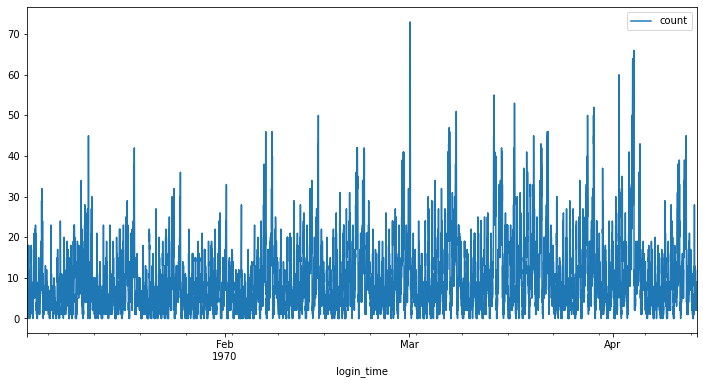

In [19]:
df_count = login_times.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

In [20]:
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


The average number of logins per 15 minutes is 7. The mean is being driven up by the spikes in our dataset.

Looking at daily distrbutions

In [21]:
df_count = df_count.assign(month_day=df_count.index.day)
df_count = df_count.assign(weekday=df_count.index.weekday)
df_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


In [22]:
spike = np.quantile(df_count,0.99)
df_spike = df_count[df_count['count'] >= spike]
month_days = []
weekdays = []
for date in df_spike.index:
    month_days.append(date.day)
    weekdays.append(date.weekday())
    
df_spike_days = pd.DataFrame(month_days,columns=['day'],index=range(len(month_days)))
df_spike_weekdays = pd.DataFrame(weekdays,columns=['weekday'],index=range(len(weekdays)))

In [23]:
df_spike_days.day.value_counts()[0:10]

21    25
4     24
15    18
22    18
28    17
7     15
8     15
14    14
29    14
3     13
Name: day, dtype: int64

In [24]:
df_spike_weekdays.weekday.value_counts()

5    104
6    103
4     48
3     15
1      7
2      7
0      2
Name: weekday, dtype: int64

User login hikes occur on the weekends.

<AxesSubplot:xlabel='login_time'>

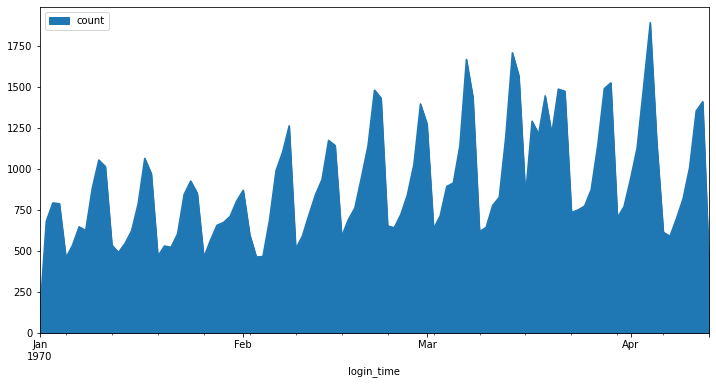

In [30]:
df_day = login_times.resample('1D').sum()
df_day.plot(kind='area',figsize=(12,6))

January has less logins than the later months.  The number of logins increase throughout the year.  